In [6]:
import pandas as pd

df = pd.read_csv('/Users/honeymustard/Desktop/data/Data_Job_SF.csv')
df.head()


,Job_title,Company,State,City,Min_Salary,Max_Salary,Job_Desc,Industry,Rating,Date_Posted,Valid_until,Job_Type
0,Senior Data Scientist - Underwriting Algorithms,Faire,CA,San Francisco,151875,170407,Faire is using machine learning to change whol...,Business Services,4.3,2020-05-06,2020-06-05,FULL_TIME
1,Data Scientist,GovTech,CA,San Francisco,78594,147225,We are looking for Data Scientists who are int...,Government,3.6,2020-05-01,2020-06-05,FULL_TIME
2,Data Scientist,Triplebyte,CA,San Francisco,145000,225000,This company is in a hiring surge in response ...,Information Technology,3.6,2020-04-28,2020-06-05,FULL_TIME
3,Data Scientist,Notion Labs,CA,San Francisco,105765,142959,"So, what will you do as a Data Scientist at No...",Information Technology,5.0,2020-05-04,2020-06-05,FULL_TIME
4,Data Scientist,Seen by Indeed,CA,San Francisco,110377,143329,With one application you can be considered for...,NaN,NaN,2020-04-25,2020-06-05,FULL_TIME


In [7]:
# Method A: direct arithmetic
df['avg_salary'] = (df['Min_Salary'] + df['Max_Salary']) / 2

# Method B: using .mean(axis=1)
df['avg_salary'] = df[['Min_Salary','Max_Salary']].mean(axis=1)


In [8]:
df['salary_minmax'] = (df['avg_salary'] - df['avg_salary'].min()) / \
                      (df['avg_salary'].max() - df['avg_salary'].min())


In [9]:
df['salary_zscore'] = (df['avg_salary'] - df['avg_salary'].mean()) / \
                      df['avg_salary'].std()


In [10]:
bins = [df['avg_salary'].min(), 50000, 100000, df['avg_salary'].max()]
labels = ['Low','Mid','High']
df['salary_bin'] = pd.cut(df['avg_salary'], bins=bins, labels=labels)


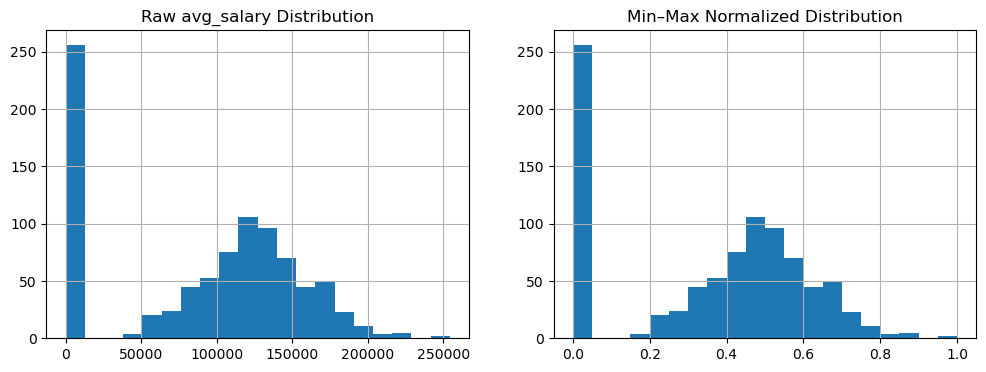

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2, figsize=(12,4))
df['avg_salary'].hist(ax=axes[0], bins=20)
axes[0].set_title('Raw avg_salary Distribution')
df['salary_minmax'].hist(ax=axes[1], bins=20)
axes[1].set_title('Min–Max Normalized Distribution')
plt.show()


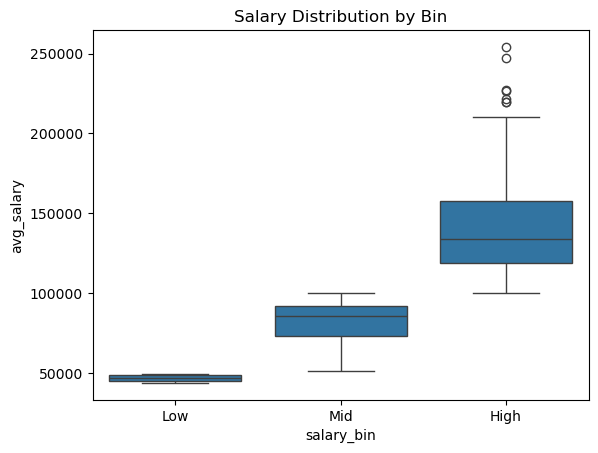

In [12]:
import seaborn as sns

sns.boxplot(x='salary_bin', y='avg_salary', data=df)
plt.title('Salary Distribution by Bin')
plt.show()
